In [ ]:
from google.colab import auth
import gspread
from google.auth import default

# Authenticate Google Colab with Google Drive
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# Open Google Sheet by name
spreadsheet = gc.open("Student Management System")

# Select the sheet inside the file
worksheet = spreadsheet.worksheet("Reg Clean")

# Get all values from the sheet
data = worksheet.get_all_values()

In [ ]:
import pandas as pd

# Convert to dataFrame
df = pd.DataFrame(data)

# Set first row as column names
df.columns = df.iloc[0] #set first row as column names
df = df[1:] # removes first row from the data

# convert numeric columns
df = df.apply(pd.to_numeric, errors='ignore')

# display first few rows
df.head()

<ipython-input-4-5183a4204e60>:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


,Attendance (%),Overall Semester Performance (%),Average Ex Score
1,97.14,53.50,11.50
2,91.43,38.00,6.50
3,85.71,33.50,5.50
4,85.71,18.65,6.75
5,100.00,40.50,9.00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# check for missing values

print("Missing Values:\n", df.isnull().sum())

Missing Values:
 0
Attendance (%)                      0
Overall Semester Performance (%)    0
Average Ex Score                    0
dtype: int64


In [ ]:
# check basic stat
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
 0      Attendance (%)  Overall Semester Performance (%)  Average Ex Score
count      145.000000                        145.000000        145.000000
mean        89.772621                         37.099310         10.043103
std         12.860368                         21.646937          6.272207
min         40.000000                          1.000000          0.500000
25%         85.710000                         19.300000          5.000000
50%         94.290000                         33.500000          8.750000
75%        100.000000                         53.500000         14.750000
max        100.000000                         86.050000         29.000000


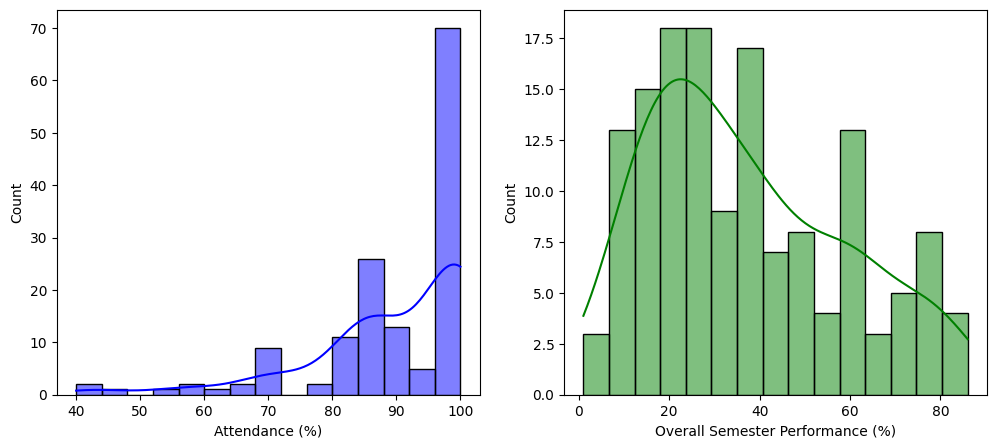

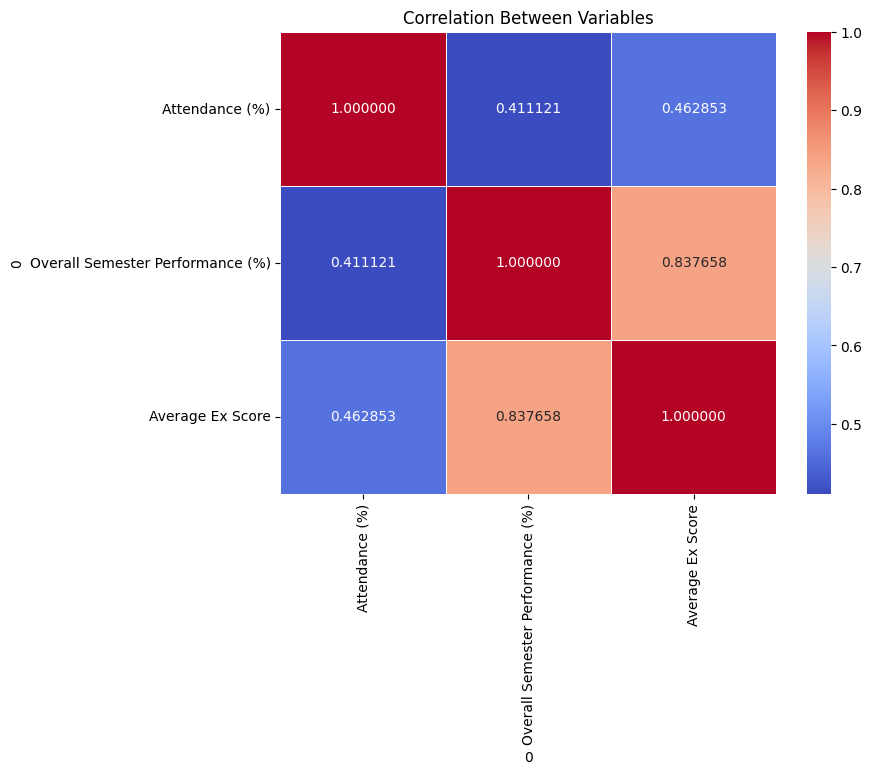

In [ ]:
# visualize distributions
plt.figure(figsize=(12,5))

# histogram for attendance
plt.subplot(1,2,1)
sns.histplot(df["Attendance (%)"], kde = True, bins = 15, color = 'blue')

# histogram for overall semester performance
plt.subplot(1,2,2)
sns.histplot(df["Overall Semester Performance (%)"], kde = True, bins = 15, color = 'green')

plt.show()

# check correlations
correlation_matrix = df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt="2f", linewidths = 0.5)
plt.title("Correlation Between Variables")
plt.show()

In [ ]:
# define the independent variables (features)
X = df[['Attendance (%)', 'Average Ex Score']]

# define the dependent variable (target)
y = df['Overall Semester Performance (%)'].values

In [ ]:
from sklearn.model_selection import train_test_split

# split the data, 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# print the shapes to confirm
X_train.shape, X_test.shape, y_test.shape

((116, 2), (29, 2), (29,))

In [ ]:
import numpy as np

#Ensure y is a list or Pandas Series before conversion
y = np.array(y) # convert y to numpy array
print("Shape before reshape:", y.shape)

# Reshape properly to match the number of samples
y = y.reshape(-1,1)
print("New shape of y:", y.shape)

Shape before reshape: (145,)
New shape of y: (145, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model correctly
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Display the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 1.3371371998641948
Coefficients: [0.07579058 2.90514903]


In [ ]:
#use the trained model to make predictions
y_pred = model.predict(X_test)

#display the first few predictions alongside actual values for comparison
import pandas as pd

results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predictions':y_pred.flatten()})
print(results_df) #show the first few rows

    Actual  Predictions
0    61.10    58.303729
1    60.20    49.588282
2    33.00    53.946005
3    48.60    42.325409
4    46.20    28.169191
5    18.30    12.190872
6    45.80    42.108648
7    17.60    23.441941
8    35.30    20.690315
9    16.65    31.800628
10   65.85    40.083310
11   20.00    25.914325
12   17.90    15.529543
13   29.50    33.609962
14   22.10    16.179068
15   62.05    58.597252
16   61.80    68.471751
17   17.20    36.515111
18   11.10    13.643446
19   45.40    33.979489
20   25.40    36.884638
21   76.45    66.292889
22   61.80    58.303729
23   26.40    18.371455
24   26.95    44.071507
25   28.35    42.988459
26   54.65    61.502401
27   28.25    60.482591
28   17.80    19.390507


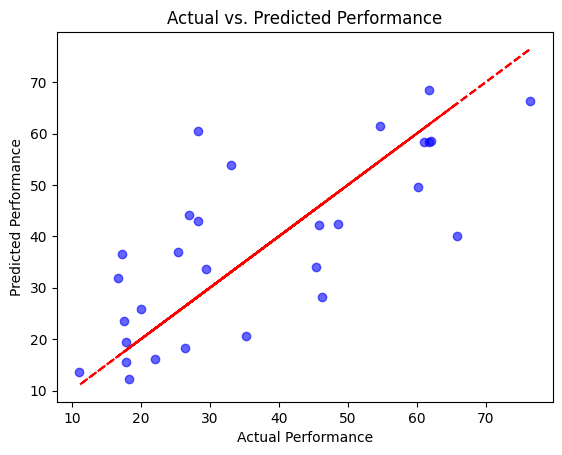

In [ ]:
import matplotlib.pyplot as plt

#scatterplot of actual vs predicted values
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.6)

#add a diagonal reference line (perfect predictions)
plt.plot(y_test, y_test, color = 'red', linestyle = 'dashed')

#labels and titles
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs. Predicted Performance")
plt.show()

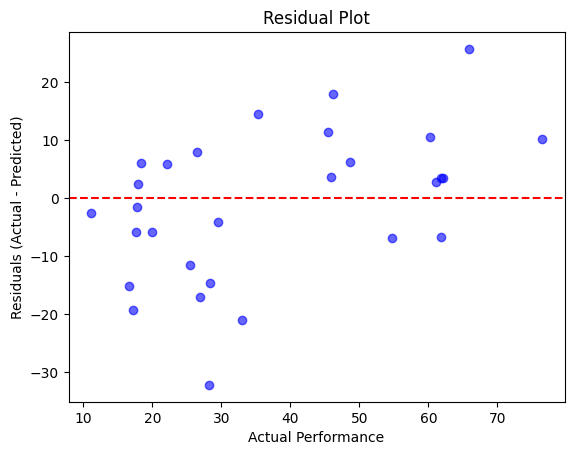

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')

# Labels and title
plt.xlabel("Actual Performance")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 161.45443546507335
R-squared (R²): 0.5347273132583619
